In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2
import os
import random
from tqdm import tqdm
import shutil

In [ ]:
# i take only VAL part of the entire dataset, it is 32K images

In [ ]:
!unzip -P 2019Deepfashion2** /content/drive/MyDrive/data/DeepFashion2/validation.zip -d /content/drive/MyDrive/DeepFashion/raw_val

In [ ]:
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data/train
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data/train/images
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data/train/labels
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data/val
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data/val/images
%mkdir /content/drive/MyDrive/DeepFashion/yolo_data/val/labels

In [ ]:
"""
Parse all .json file in a folder to Yolo format ,and save it to the folder /labels.
Yolo format: (in .txt)
    <object-class> <x> <y> <width> <height>
<object-class> : integer number of object, range: [0, num_classes-1]
<x> = <absolute_x> / <image_width>, range: [0,1]
<y> = <absolute_y> / <image_height>, range: [0,1]
<width> = <absolute_width> / <image_width>, range: [0,1]
<height> = <absolute_height> / <image_height>, range: [0,1]
"""

anno_dir_name = '/content/drive/MyDrive/DeepFashion/raw_val/validation/annos'

img_dir_name = '/content/drive/MyDrive/DeepFashion/raw_val/validation/image'

lbl_dir_name = '/content/drive/MyDrive/DeepFashion/yolo_data/train/labels'

In [ ]:
print(len(os.listdir(anno_dir_name)))
print(len(os.listdir(img_dir_name)))
print(len(os.listdir(lbl_dir_name)))

32153
32153
0


In [ ]:
for filename in os.listdir(anno_dir_name): # loop throught the entire folder
    if filename.lower().endswith('.json')==False:
        continue

    file_path = os.path.join(anno_dir_name, filename)
#    print(file_path)
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        num_object = len(data)-2

        with open(os.path.join(lbl_dir_name, filename.split('.')[0]+'.txt'), 'w') as yolo_file:
            img = cv2.imread(os.path.join(img_dir_name, filename.split('.')[0]+'.jpg')) # load input image
            img_width = img.shape[1]
            img_height = img.shape[0]
            for i in range(1, num_object+1): # for each object
                class_ID = data['item{}'.format(i)]['category_id']-1
                x1 = data['item{}'.format(i)]['bounding_box'][0]
                y1 = data['item{}'.format(i)]['bounding_box'][1]
                x2 = data['item{}'.format(i)]['bounding_box'][2]
                y2 = data['item{}'.format(i)]['bounding_box'][3]
                

                yolo_x = (x1+x2)/img_width/2  # relative center x
                yolo_y = (y1+y2)/img_height/2 # relative center y
                yolo_width = (x2-x1)/img_width
                yolo_height = (y2-y1)/img_height

                # output YOLO format
                yolo_file.write("{} {:.6f} {:.6f} {:.6f} {:.6f}\n".format(class_ID, yolo_x, yolo_y, yolo_width, yolo_height))

In [ ]:
print(len(os.listdir(anno_dir_name)))
print(len(os.listdir(img_dir_name)))
print(len(os.listdir(lbl_dir_name)))

32153
32153
32153


In [ ]:
# copy images data from raw to yolo folder
%cp /content/drive/MyDrive/DeepFashion/raw_val/validation/image/*.jpg /content/drive/MyDrive/DeepFashion/yolo_data/train/images

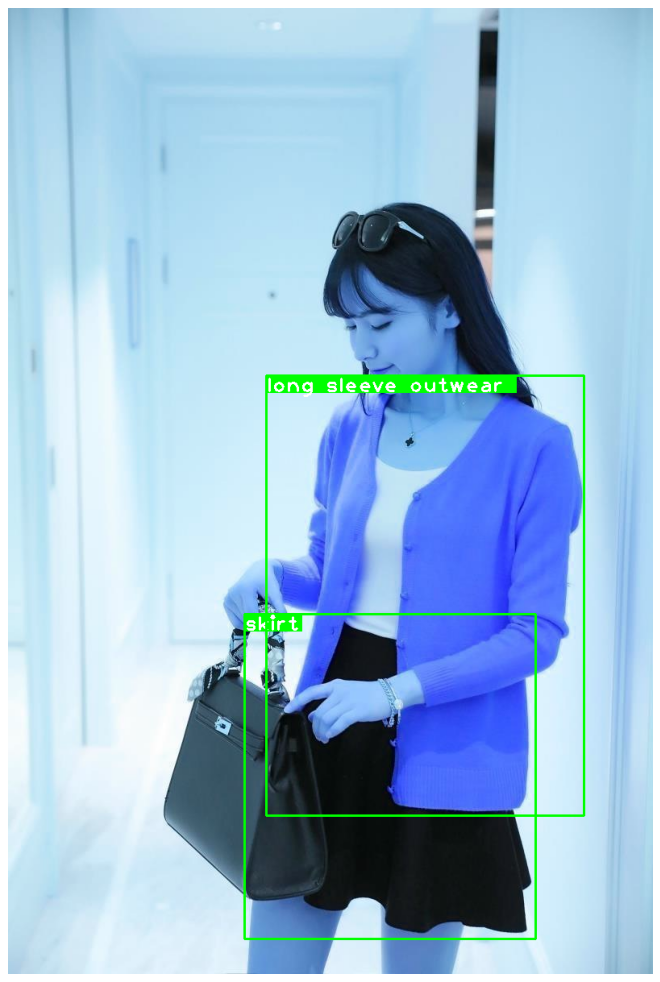

In [ ]:
# visualization bboxes

classes = {0:'short sleeve top', 1:'long sleeve top', 2:'short sleeve outwear',
           3:'long sleeve outwear', 4:'vest',5:'sling', 6:'shorts', 7:'trousers', 
           8:'skirt', 9:'short sleeve dress', 10:'long sleeve dress', 
           11:'vest dress', 12:'sling dress'}

annos = os.listdir(anno_dir_name)

annos_random = random.sample(annos, 1)
from matplotlib.pyplot import figure

figure(figsize=(18, 16), dpi=80)
for filename in annos_random: # loop throught the entire folder
    if filename.lower().endswith('.json')==False:
        continue

    file_path = os.path.join(anno_dir_name, filename)
#    print(file_path)
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        num_object = len(data)-2

        with open(os.path.join(lbl_dir_name, filename.split('.')[0]+'.txt'), 'w') as yolo_file:
            img = cv2.imread(os.path.join(img_dir_name, filename.split('.')[0]+'.jpg')) # load input image
            img_width = img.shape[1]
            img_height = img.shape[0]
            for i in range(1, num_object+1): # for each object
                class_ID = data['item{}'.format(i)]['category_id']-1
                x1 = data['item{}'.format(i)]['bounding_box'][0]
                y1 = data['item{}'.format(i)]['bounding_box'][1]
                x2 = data['item{}'.format(i)]['bounding_box'][2]
                y2 = data['item{}'.format(i)]['bounding_box'][3]
                

                yolo_x = (x1+x2)/img_width/2  # relative center x
                yolo_y = (y1+y2)/img_height/2 # relative center y
                yolo_width = (x2-x1)/img_width
                yolo_height = (y2-y1)/img_height

                # output YOLO format
                cv2.rectangle(
                  img,
                  (int(x1), int(y1)),
                  (int(x2), int(y2)),
                  color=(0, 255, 0),
                  thickness=2
                )
                ((label_width, label_height), _) = cv2.getTextSize(
                    classes[class_ID],
                    fontFace=cv2.FONT_HERSHEY_PLAIN,
                    fontScale=1.75,
                    thickness=2
                )
                cv2.rectangle(
                  img,
                  (int(x1), int(y1)),
                  (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
                  color=(0, 255, 0),
                  thickness=cv2.FILLED
                )
                cv2.putText(
                  img,
                  classes[class_ID],
                  org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
                  fontFace=cv2.FONT_HERSHEY_PLAIN,
                  fontScale=1.75,
                  color=(255, 255, 255),
                  thickness=2
                )
                
                plt.imshow(img)
                plt.axis('off');

# Creating validation split (20%)

In [ ]:
#move random 20% from train to val
src_x_train_dir = '/content/drive/MyDrive/DeepFashion/yolo_data/train/images'
img_names = os.listdir(src_x_train_dir)

src_y_train_dir = '/content/drive/MyDrive/DeepFashion/yolo_data/train/labels'
label_names  = os.listdir(src_y_train_dir)

val_dir_x = '/content/drive/MyDrive/DeepFashion/yolo_data/val/images'
val_dir_y = '/content/drive/MyDrive/DeepFashion/yolo_data/val/labels'

img_names = [x[:-4] for x in os.listdir(src_x_train_dir)]
label_names = [x[:-4] for x in os.listdir(src_y_train_dir)]

In [ ]:
print(len(img_names))
print(len(label_names))

32153

In [ ]:
val_names = random.sample(img_names, int(len(img_names) * 0.2))
val_names

In [ ]:
for i, name in tqdm(enumerate(val_names), total=len(val_names), desc='extracting validation part'):
    shutil.move(os.path.join(src_x_train_dir, name + '.jpg'), os.path.join(val_dir_x, name + '.jpg'))
    shutil.move(os.path.join(src_y_train_dir, name + '.txt'), os.path.join(val_dir_y, name + '.txt'))

Выделение набора валидации: 100%|██████████| 6430/6430 [00:48<00:00, 132.51it/s]


In [ ]:
len(os.listdir(val_dir_y))

6430

## YOLOv5 downloading

In [ ]:
%cd /content/drive/MyDrive/DeepFashion

In [ ]:
%pwd

In [ ]:
# downloading YOLO5
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15291, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15291 (delta 0), reused 1 (delta 0), pack-reused 15287
Receiving objects: 100% (15291/15291), 14.19 MiB | 11.99 MiB/s, done.
Resolving deltas: 100% (10483/10483), done.


In [ ]:
%cd yolov5

In [ ]:
!pip install -r requirements.txt 

In [ ]:
%pwd

In [ ]:
#creating data.yaml with pathes and classes

yaml_content = """
train: /content/drive/MyDrive/DeepFashion/valid1/validation/train
val: /content/drive/MyDrive/DeepFashion/valid1/validation/val


# number of classes
nc: 13

# class names
names: ['short sleeve top', 'long sleeve top', 'short sleeve outwear', 'long sleeve outwear', 'vest', 'sling', 'shorts', 'trousers', 'skirt', 
'short sleeve dress', 'long sleeve dress', 'vest dress', 'sling dress']
"""

with open('deepfashdata.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.3/972.3 KB 48.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀


# TRAIN YOLOv5n

In [ ]:
!python train.py --img 640 --data deepfashdata.yaml --cfg /content/drive/MyDrive/DeepFashion/yolov5/models/yolov5n.yaml --batch-size 16 --name Model_5n --weights yolov5n.pt --epochs 50 

train: weights=yolov5n.pt, cfg=/content/drive/MyDrive/DeepFashion/yolo5/yolov5/models/yolov5n.yaml, data=deepfashdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Model_5n, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1

In [ ]:
!python train.py --img 640 --data deepfashdata.yaml --cfg /content/drive/MyDrive/DeepFashion/yolov5/models/yolov5n.yaml --batch-size 16 --name Model_5n --weights yolov5n.pt --epochs 5